In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

In [16]:
# Read diamonds.csv and create dataframe
survey = pd.read_csv('diamonds.csv')
survey.head(10)
#print(survey['color'].unique())

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [39]:
# Let's re-format some of the data so we have numerical values for the cut, color, and clarity for comparison purposes.

# First create dictionaries for each column
cut_score = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}
color_score = {'J': 1, 'I': 2, 'H': 3, 'G': 4, 'F': 5, 'E': 6, 'D': 7}
clarity_score = {'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 'VVS2': 6, 'VVS1': 7, 'IF': 8}

survey['cut_score'] = survey['cut'].replace(cut_score)
survey['color_score'] = survey['color'].replace(color_score)
survey['clarity_score'] = survey['clarity'].replace(clarity_score)
survey.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,cut_score,color_score,clarity_score
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,5,6,2
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,4,6,3
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2,6,5
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4,2,4
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2,1,2


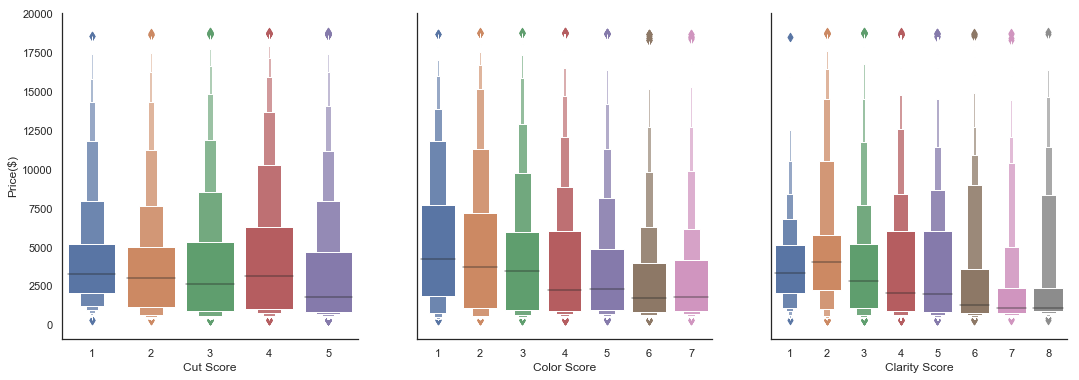

In [56]:
# Now, giving each value a numerical score does help in ordering the variables, but it does little to give context. 
# Does a diamond with a cut score 4 mean it's twice as better as a score 2 diamond? Let's find out.
f, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
sns.set(style='white')
sns.despine()

y = 'price'

# Boxenplots Price vs. Cut/Color/Clarity scores
ax1 = axes[0]
ax1 = sns.boxenplot('cut_score', y, data=survey, ax=ax1)
ax1.set_xlabel('Cut Score')
ax1.set_ylabel('Price($)')

ax2 = axes[1]
ax2 = sns.boxenplot('color_score', y, data=survey, ax=ax2)
ax2.set_xlabel('Color Score')
ax2.set_ylabel('')

ax3 = axes[2]
ax3 = sns.boxenplot('clarity_score', y, data=survey, ax=ax3)
ax3.set_xlabel('Clarity Score')
ax3.set_ylabel('')

plt.show()

The plots indicate that none of these variables alone are very closely tied to the price of the diamond. Therefore, we can safely assume that the ratio between the scores is okay as is. 

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64


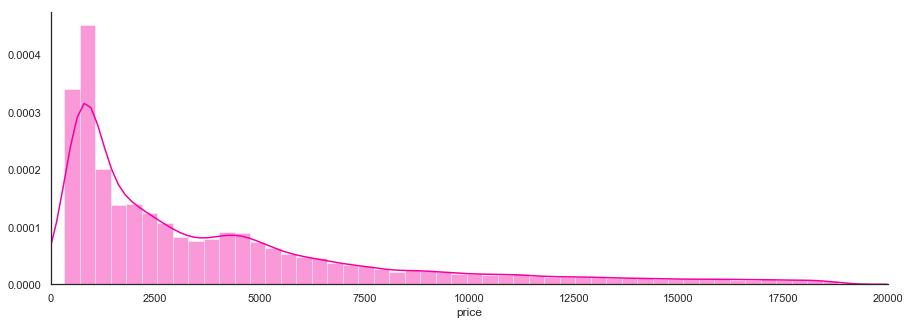

In [74]:
# Let's see how the prices are distributed in our sample
f, ax = plt.subplots(figsize=(15, 5))
sns.set(style='white')
sns.despine()
ax.set_xlim([0, 20000])

sns.distplot(survey['price'], color='#f4009f')

print(survey['price'].describe())
plt.show()